# OTT Churn Prediction using different Models

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_validate , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score,roc_curve , precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  
import seaborn as sns

## cleaning data

In [2]:
df = pd.read_csv('ott_churn_cleaned.csv')
df.head()
df = df.drop(columns = ['customer_id'])

In [3]:
df.head(10)

,signup_month,tenure_months,plan_type,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,auto_renew,genre_pref,has_kids_profile,device_type,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,payment_method,is_churned
0,Feb,18.0,Basic,599.0,5.0,54.0,2.0,27.0,No,Action,Yes,Smart TV,5.0,1.0,40.9,51.0,UPI,1
1,NaN,3.0,Basic,599.0,4.0,10.9,4.0,13.0,No,Comedy,No,Smart TV,2.0,1.0,60.9,46.0,UPI,1
2,Feb,20.0,Standard,199.0,2.0,31.3,1.0,21.0,Yes,Documentary,No,Tablet,4.0,1.0,58.9,30.0,UPI,1
3,Jul,35.0,Basic,599.0,5.0,34.1,3.0,25.0,Yes,Comedy,No,Laptop,5.0,0.0,NaN,36.0,UPI,1
4,Feb,30.0,Premium,399.0,3.0,44.5,9.0,0.0,No,Documentary,No,Mobile,4.0,1.0,31.9,9.0,UPI,0
5,Feb,3.0,Basic,199.0,5.0,31.6,0.0,5.0,Yes,Horror,Yes,Smart TV,4.0,1.0,72.0,30.0,UPI,1
6,Jan,15.0,Basic,NaN,5.0,63.7,1.0,22.0,Yes,Horror,Yes,Laptop,2.0,0.0,51.7,13.0,Net Banking,1
7,Apr,18.0,Basic,NaN,3.0,34.7,9.0,4.0,No,Action,Yes,Smart TV,2.0,0.0,44.1,23.0,Net Banking,0
8,Jun,35.0,Basic,399.0,5.0,30.4,1.0,8.0,Yes,Comedy,No,Mobile,2.0,1.0,31.1,12.0,Net Banking,0
9,Jul,10.0,Premium,399.0,1.0,38.4,1.0,6.0,Yes,Documentary,No,Smart TV,NaN,1.0,38.1,56.0,Net Banking,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8140 entries, 0 to 8139
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   signup_month              7994 non-null   object 
 1   tenure_months             7975 non-null   float64
 2   plan_type                 7976 non-null   object 
 3   monthly_fee               7979 non-null   float64
 4   num_profiles              7970 non-null   float64
 5   watch_hours_last_month    7985 non-null   float64
 6   binge_days_last_month     8001 non-null   float64
 7   last_login_days_ago       7973 non-null   float64
 8   auto_renew                7993 non-null   object 
 9   genre_pref                7996 non-null   object 
 10  has_kids_profile          7982 non-null   object 
 11  device_type               7975 non-null   object 
 12  num_devices_used          7968 non-null   float64
 13  support_tickets_last_3mo  7983 non-null   float64
 14  avg_watc

In [5]:
df['tenure_months'] = pd.to_numeric(df['tenure_months'], errors='coerce')
df['tenure_months'] = df['tenure_months'].fillna(df['tenure_months'].median())
df['tenure_bin'] = pd.cut(df['tenure_months'], bins=[0, 3, 6, 12, 24, 100], labels=['1', '2', '3', '4', '5'], include_lowest=True)

In [6]:
customer_counts = df['tenure_bin'].value_counts().sort_index()
print(customer_counts)

tenure_bin
1     701
2     683
3    1317
4    2948
5    2491
Name: count, dtype: int64


In [7]:

from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)
    







C:\Users\tjsss\AppData\Local\Temp\ipykernel_39644\281127979.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [8]:
df.isnull().sum()


tenure_months                 0
monthly_fee                   0
num_profiles                  0
watch_hours_last_month        0
binge_days_last_month         0
last_login_days_ago           0
num_devices_used              0
support_tickets_last_3mo      0
avg_watch_session_min         0
ads_watched_last_month        0
is_churned                    0
tenure_bin                    0
signup_month_Feb              0
signup_month_Jan              0
signup_month_Jul              0
signup_month_Jun              0
signup_month_Mar              0
signup_month_May              0
plan_type_Premium             0
plan_type_Standard            0
auto_renew_Yes                0
genre_pref_Comedy             0
genre_pref_Documentary        0
genre_pref_Drama              0
genre_pref_Horror             0
genre_pref_Sci-Fi             0
has_kids_profile_Yes          0
device_type_Mobile            0
device_type_Smart TV          0
device_type_Tablet            0
payment_method_Debit Card     0
payment_

In [9]:
df.describe()

,tenure_months,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,is_churned
count,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000,8140.000000
mean,18.010197,397.696579,2.996361,34.794051,4.435571,14.812618,3.013178,0.687962,55.380247,29.337004,0.573219
std,9.997445,162.479575,1.402125,14.775227,2.860929,8.772087,1.396801,0.832421,19.682862,17.090191,0.494640
min,1.000000,199.000000,1.000000,-0.100000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,10.000000,199.000000,2.000000,24.800000,2.000000,7.000000,2.000000,0.000000,42.400000,15.000000,0.000000
50%,18.000000,399.000000,3.000000,34.794051,4.000000,14.812618,3.000000,0.687962,55.380247,29.337004,1.000000
75%,26.000000,599.000000,4.000000,44.600000,7.000000,22.000000,4.000000,1.000000,68.600000,44.000000,1.000000
max,35.000000,599.000000,5.000000,92.500000,9.000000,30.000000,5.000000,6.000000,124.900000,59.000000,1.000000


In [10]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

df.head()

,tenure_months,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,...,genre_pref_Drama,genre_pref_Horror,genre_pref_Sci-Fi,has_kids_profile_Yes,device_type_Mobile,device_type_Smart TV,device_type_Tablet,payment_method_Debit Card,payment_method_Net Banking,payment_method_UPI
0,18.0,599.0,5.0,54.0,2.0,27.0,5.0,1.0,40.900000,51.0,...,0,0,0,1,0,1,0,0,0,1
1,3.0,599.0,4.0,10.9,4.0,13.0,2.0,1.0,60.900000,46.0,...,0,0,0,0,0,1,0,0,0,1
2,20.0,199.0,2.0,31.3,1.0,21.0,4.0,1.0,58.900000,30.0,...,0,0,0,0,0,0,1,0,0,1
3,35.0,599.0,5.0,34.1,3.0,25.0,5.0,0.0,55.380247,36.0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,399.0,3.0,44.5,9.0,0.0,4.0,1.0,31.900000,9.0,...,0,0,0,0,1,0,0,0,0,1


## visualizing data

In [11]:
ndf = df.loc[df['is_churned'] == 0]

Text(0.5, 1.0, 'Distribution of lastLoginDays')

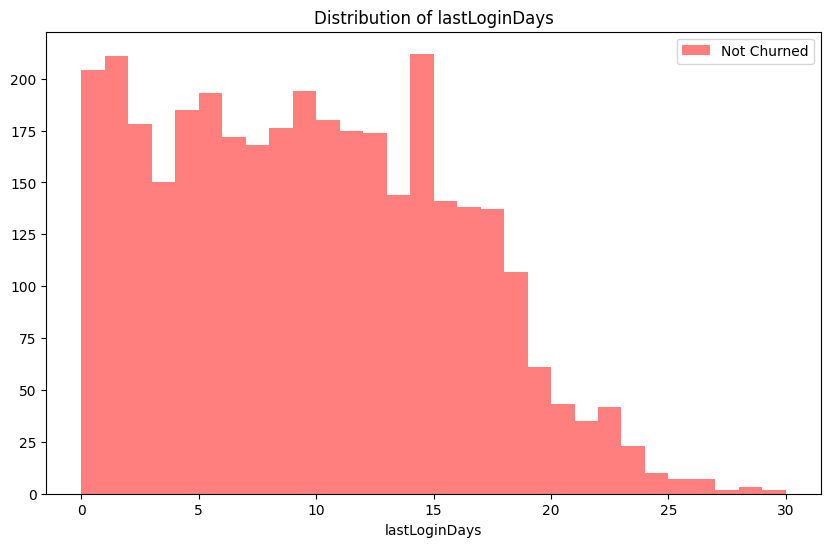

In [12]:
plt.figure(figsize=(10, 6))
plt.xlabel('lastLoginDays')
plt.hist(ndf['last_login_days_ago'], bins=30, color='red', alpha=0.5 ,label='Not Churned')
plt.legend(loc = 'upper right')
plt.title('Distribution of lastLoginDays')

Text(0.5, 1.0, 'Distribution of binge_days_last_month')

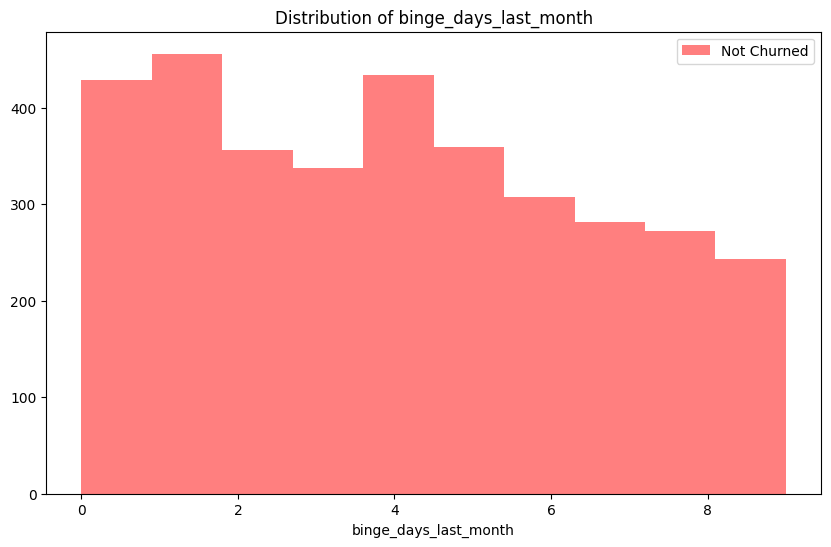

In [13]:
plt.figure(figsize=(10, 6))
plt.xlabel('binge_days_last_month')
plt.hist(ndf['binge_days_last_month'], bins=10, color='red', alpha=0.5 ,label='Not Churned')
plt.legend(loc = 'upper right')
plt.title('Distribution of binge_days_last_month')

Text(0.5, 1.0, 'Distribution of support_tickets_last_3mo')

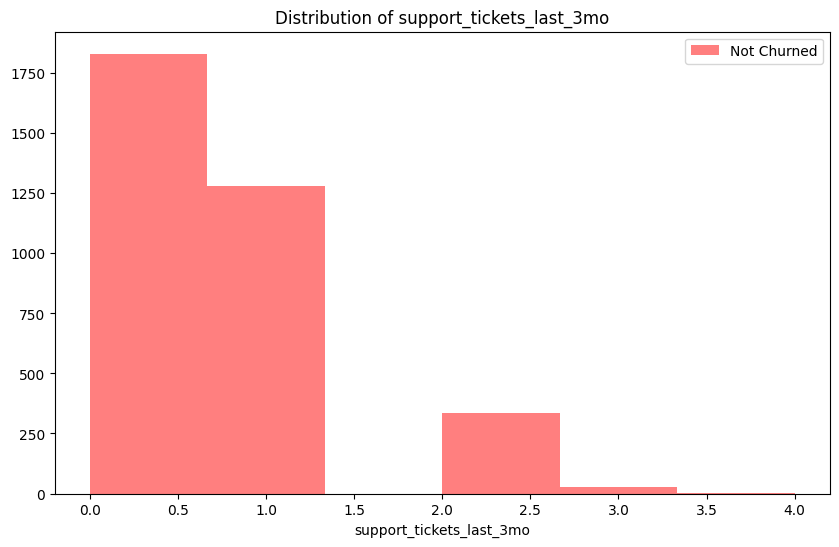

In [14]:
plt.figure(figsize=(10, 6))
plt.xlabel('support_tickets_last_3mo')
plt.hist(ndf['support_tickets_last_3mo'], bins=6, color='red', alpha=0.5 ,label='Not Churned')
plt.legend(loc = 'upper right')
plt.title('Distribution of support_tickets_last_3mo')

Text(0.5, 1.0, 'Distribution of tenure_months')

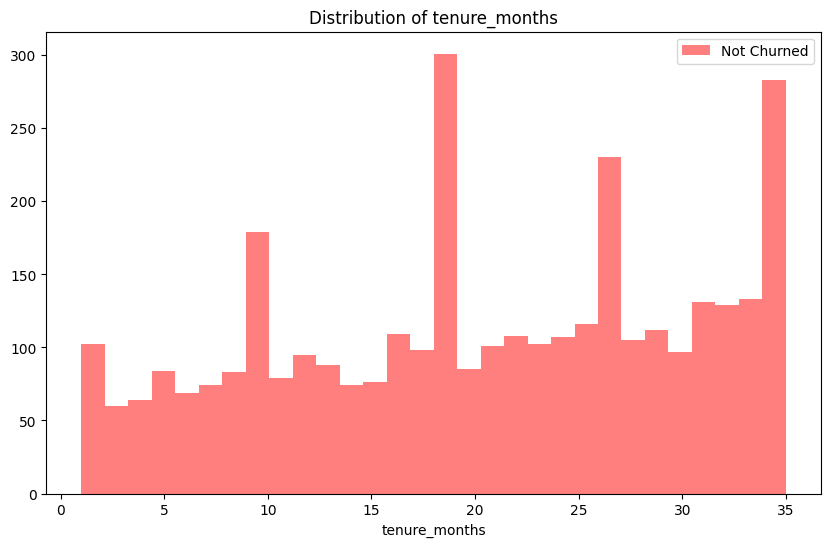

In [15]:
plt.figure(figsize=(10, 6))
plt.xlabel('tenure_months')
plt.hist(ndf['tenure_months'], bins=30, color='red', alpha=0.5 ,label='Not Churned')
plt.legend(loc = 'upper right')
plt.title('Distribution of tenure_months')

Text(0.5, 1.0, 'Distribution of watch_hours_last_month')

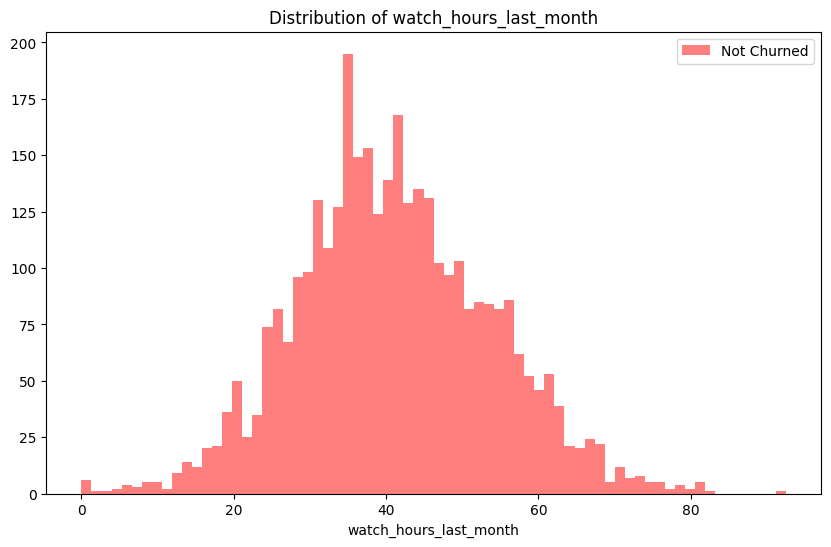

In [16]:
plt.figure(figsize=(10, 6))
plt.xlabel('watch_hours_last_month')
plt.hist(ndf['watch_hours_last_month'], bins=70, color='red', alpha=0.5 ,label='Not Churned')
plt.legend(loc = 'upper right')
plt.title('Distribution of watch_hours_last_month')

In [17]:
corr_matrix = df.corr()
corr_w_churned = corr_matrix['is_churned'].sort_values(ascending=False)
print(corr_w_churned)


is_churned                    1.000000
last_login_days_ago           0.540651
binge_days_last_month         0.130173
support_tickets_last_3mo      0.110393
signup_month_Jan              0.092644
signup_month_Feb              0.049894
genre_pref_Horror             0.037635
ads_watched_last_month        0.019701
device_type_Mobile            0.009882
device_type_Tablet            0.006599
payment_method_Net Banking    0.005545
auto_renew_Yes                0.004972
genre_pref_Sci-Fi             0.004916
genre_pref_Drama              0.001745
num_devices_used              0.000319
plan_type_Premium            -0.001264
payment_method_Debit Card    -0.001395
plan_type_Standard           -0.011627
genre_pref_Comedy            -0.013110
signup_month_Jul             -0.017155
genre_pref_Documentary       -0.019066
monthly_fee                  -0.019642
signup_month_Mar             -0.022306
device_type_Smart TV         -0.023894
payment_method_UPI           -0.030787
signup_month_May         

In [18]:

df.head()

,tenure_months,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,...,genre_pref_Drama,genre_pref_Horror,genre_pref_Sci-Fi,has_kids_profile_Yes,device_type_Mobile,device_type_Smart TV,device_type_Tablet,payment_method_Debit Card,payment_method_Net Banking,payment_method_UPI
0,18.0,599.0,5.0,54.0,2.0,27.0,5.0,1.0,40.900000,51.0,...,0,0,0,1,0,1,0,0,0,1
1,3.0,599.0,4.0,10.9,4.0,13.0,2.0,1.0,60.900000,46.0,...,0,0,0,0,0,1,0,0,0,1
2,20.0,199.0,2.0,31.3,1.0,21.0,4.0,1.0,58.900000,30.0,...,0,0,0,0,0,0,1,0,0,1
3,35.0,599.0,5.0,34.1,3.0,25.0,5.0,0.0,55.380247,36.0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,399.0,3.0,44.5,9.0,0.0,4.0,1.0,31.900000,9.0,...,0,0,0,0,1,0,0,0,0,1


In [19]:
df.head(20)



,tenure_months,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,num_devices_used,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,...,genre_pref_Drama,genre_pref_Horror,genre_pref_Sci-Fi,has_kids_profile_Yes,device_type_Mobile,device_type_Smart TV,device_type_Tablet,payment_method_Debit Card,payment_method_Net Banking,payment_method_UPI
0,18.0,599.000000,5.0,54.0,2.000000,27.0,5.000000,1.0,40.900000,51.0,...,0,0,0,1,0,1,0,0,0,1
1,3.0,599.000000,4.0,10.9,4.000000,13.0,2.000000,1.0,60.900000,46.0,...,0,0,0,0,0,1,0,0,0,1
2,20.0,199.000000,2.0,31.3,1.000000,21.0,4.000000,1.0,58.900000,30.0,...,0,0,0,0,0,0,1,0,0,1
3,35.0,599.000000,5.0,34.1,3.000000,25.0,5.000000,0.0,55.380247,36.0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,399.000000,3.0,44.5,9.000000,0.0,4.000000,1.0,31.900000,9.0,...,0,0,0,0,1,0,0,0,0,1
5,3.0,199.000000,5.0,31.6,0.000000,5.0,4.000000,1.0,72.000000,30.0,...,0,1,0,1,0,1,0,0,0,1
6,15.0,397.696579,5.0,63.7,1.000000,22.0,2.000000,0.0,51.700000,13.0,...,0,1,0,1,0,0,0,0,1,0
7,18.0,397.696579,3.0,34.7,9.000000,4.0,2.000000,0.0,44.100000,23.0,...,0,0,0,1,0,1,0,0,1,0
8,35.0,399.000000,5.0,30.4,1.000000,8.0,2.000000,1.0,31.100000,12.0,...,0,0,0,0,1,0,0,0,1,0
9,10.0,399.000000,1.0,38.4,1.000000,6.0,3.013178,1.0,38.100000,56.0,...,0,0,0,0,0,1,0,0,1,0


In [20]:
df.describe()
df['is_churned'] = df['is_churned'].replace(2, 1)

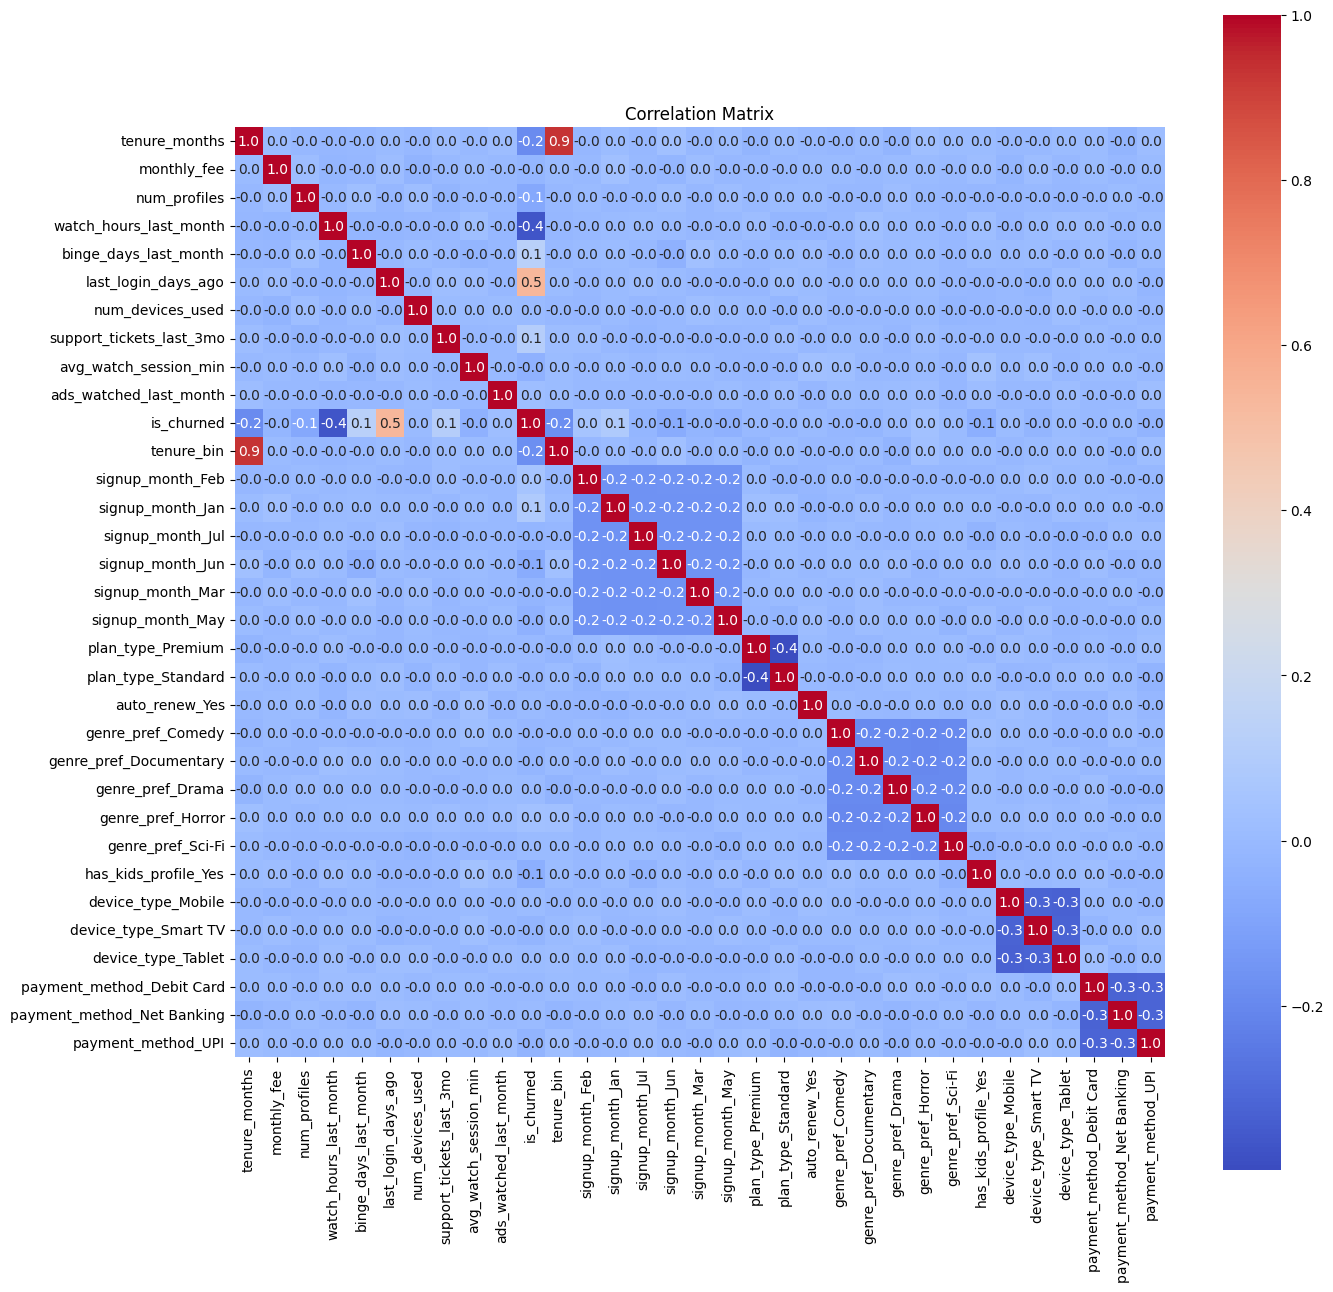

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
df = df.drop(columns = ['device_type_Mobile', 'device_type_Smart TV', 'device_type_Tablet', 'payment_method_Net Banking', 'auto_renew_Yes', 'genre_pref_Sci-Fi', 'genre_pref_Drama', 'num_devices_used', 'plan_type_Premium', 'payment_method_Debit Card'])           



In [23]:
df.head()

,tenure_months,monthly_fee,num_profiles,watch_hours_last_month,binge_days_last_month,last_login_days_ago,support_tickets_last_3mo,avg_watch_session_min,ads_watched_last_month,is_churned,...,signup_month_Jul,signup_month_Jun,signup_month_Mar,signup_month_May,plan_type_Standard,genre_pref_Comedy,genre_pref_Documentary,genre_pref_Horror,has_kids_profile_Yes,payment_method_UPI
0,18.0,599.0,5.0,54.0,2.0,27.0,1.0,40.900000,51.0,1,...,0,0,0,0,0,0,0,0,1,1
1,3.0,599.0,4.0,10.9,4.0,13.0,1.0,60.900000,46.0,1,...,0,0,0,0,0,1,0,0,0,1
2,20.0,199.0,2.0,31.3,1.0,21.0,1.0,58.900000,30.0,1,...,0,0,0,0,1,0,1,0,0,1
3,35.0,599.0,5.0,34.1,3.0,25.0,0.0,55.380247,36.0,1,...,1,0,0,0,0,1,0,0,0,1
4,30.0,399.0,3.0,44.5,9.0,0.0,1.0,31.900000,9.0,0,...,0,0,0,0,0,0,1,0,0,1


In [24]:
df.head(10)
X = df.drop(columns=['is_churned'])
Y = df['is_churned']
X.shape , Y.shape

((8140, 22), (8140,))

In [25]:
X_train , X_test , Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 12345, stratify=Y)

models = [("Logistic Regression" , LogisticRegression() , True) ,
("SVM" , SVC() , True) , 
("Decision Tree" , DecisionTreeClassifier() , False) ,
("KNN" , KNeighborsClassifier() , True) ,
("Random Forest" , RandomForestClassifier() , False) ,
("XGBoost" , XGBClassifier(enable_categorical=True, tree_method='hist') , False) ]

result = []
names = []
scoring = ['accuracy' , 'roc_auc' , 'f1', 'precision']
for name, model , scale in models:
    steps = []
    if scale:
        steps.append(('scaler', StandardScaler()))
    steps.append(('model', model))
    
    pipe = Pipeline(steps)
    cv = cross_validate(pipe, X_train, Y_train, cv=10, scoring=scoring)
    result.append(cv)
    names.append(name)
    print(f"{name} : ")
    for metric in scoring:
        mean_score = cv[f"test_{metric}"].mean()
        std_score = cv[f'test_{metric}'].std()
        print(f"  {metric}: {mean_score:.4f} (+/- {std_score:.4f})")
    

Logistic Regression : 
  accuracy: 0.8491 (+/- 0.0148)
  roc_auc: 0.9333 (+/- 0.0097)
  f1: 0.8686 (+/- 0.0139)
  precision: 0.8669 (+/- 0.0112)
SVM : 
  accuracy: 0.8698 (+/- 0.0098)
  roc_auc: 0.9479 (+/- 0.0090)
  f1: 0.8865 (+/- 0.0092)
  precision: 0.8857 (+/- 0.0074)
Decision Tree : 
  accuracy: 0.8246 (+/- 0.0139)
  roc_auc: 0.8207 (+/- 0.0145)
  f1: 0.8469 (+/- 0.0125)
  precision: 0.8478 (+/- 0.0179)
KNN : 
  accuracy: 0.7674 (+/- 0.0082)
  roc_auc: 0.8340 (+/- 0.0109)
  f1: 0.7964 (+/- 0.0076)
  precision: 0.7995 (+/- 0.0102)
Random Forest : 
  accuracy: 0.8794 (+/- 0.0092)
  roc_auc: 0.9537 (+/- 0.0070)
  f1: 0.8951 (+/- 0.0084)
  precision: 0.8928 (+/- 0.0109)
XGBoost : 
  accuracy: 0.8785 (+/- 0.0126)
  roc_auc: 0.9531 (+/- 0.0086)
  f1: 0.8939 (+/- 0.0115)
  precision: 0.8945 (+/- 0.0139)


In [26]:
modelXGB = XGBClassifier(enable_categorical=True, tree_method='hist')
modelXGB.fit(X_train, Y_train)
Y_pred = modelXGB.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("Precision Score:", precision_score(Y_test, Y_pred))


Accuracy: 0.8742014742014742
ROC AUC Score: 0.871317063638535
F1 Score: 0.8903170522707797
Precision Score: 0.889554794520548


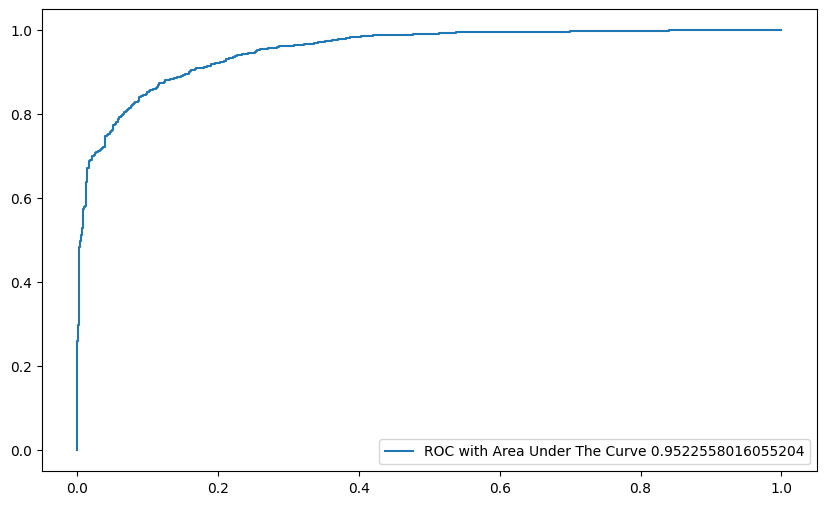

In [27]:
def gen_roc_curve(model , X_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr,tpr,thresholds = roc_curve(Y_test, y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label='ROC with Area Under The Curve ' + str(auc))
    plt.legend(loc='lower right')   
    plt.show()
    pass

gen_roc_curve(modelXGB, X_test)

## Data Analysis for Slide Deck

Percentage of customers who churned in the first year: 2.92%


Text(0, 0.5, 'Churn Percentage (%)')

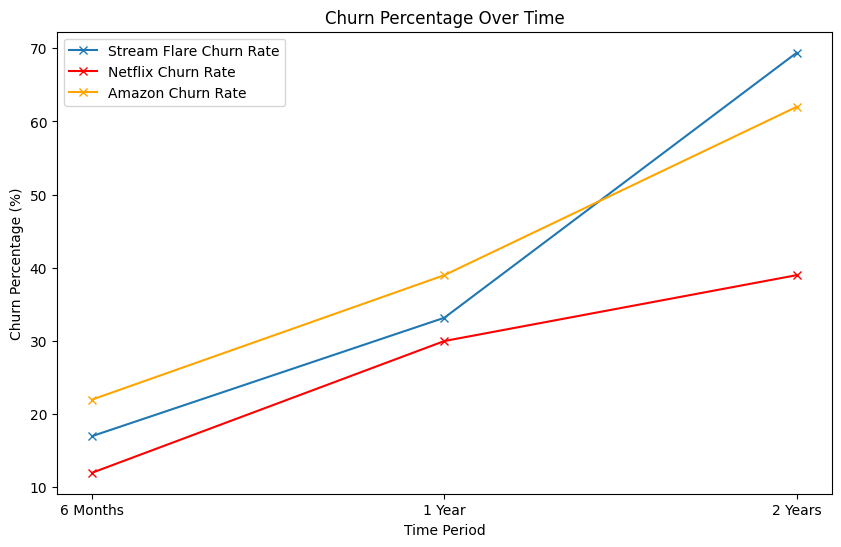

In [73]:
churnedInYear = df[df['tenure_months'].astype(int) <= 12].shape[0]
churnedPercentage1yr = (churnedInYear / df.shape[0]) * 100
print(f"Percentage of customers who churned in the first year: {churnedPercentage:.2f}%")
churnedIn2Years = df[df['tenure_months'].astype(int) <= 24].shape[0]
churnedPercentage2yr = (churnedIn2Years / df.shape[0]) * 100
churnedIn6Months = df[df['tenure_months'].astype(int) <= 6].shape[0]
churnedPercentage6mo = (churnedIn6Months / df.shape[0]) * 100
plt.figure(figsize=(10, 6))
plt.plot(['6 Months', '1 Year', '2 Years'], [churnedPercentage6mo, churnedPercentage1yr, churnedPercentage2yr], marker='x' , label='Stream Flare Churn Rate')
plt.plot(['6 Months', '1 Year', '2 Years'], [12, 30, 39 ], marker='x', color='red', label='Netflix Churn Rate')
plt.plot(['6 Months', '1 Year', '2 Years'], [22, 39, 62 ], marker='x', color='orange', label='Amazon Churn Rate')
plt.legend(loc = 'upper left')
plt.title('Churn Percentage Over Time')
plt.xlabel('Time Period') 
plt.ylabel('Churn Percentage (%)')



                    FEATURE   IMPORTANCE
5        last_login_days_ago    0.206762
3     watch_hours_last_month    0.091170
11          signup_month_Jan    0.088142
6   support_tickets_last_3mo    0.062577
0              tenure_months    0.058293
10          signup_month_Feb    0.048394
4      binge_days_last_month    0.043921
19         genre_pref_Horror    0.040346
13          signup_month_Jun    0.038545
2               num_profiles    0.033118


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'last_login_days_ago'),
  Text(1, 0, 'watch_hours_last_month'),
  Text(2, 0, 'signup_month_Jan'),
  Text(3, 0, 'support_tickets_last_3mo'),
  Text(4, 0, 'tenure_months'),
  Text(5, 0, 'signup_month_Feb'),
  Text(6, 0, 'binge_days_last_month'),
  Text(7, 0, 'genre_pref_Horror'),
  Text(8, 0, 'signup_month_Jun'),
  Text(9, 0, 'num_profiles'),
  Text(10, 0, 'monthly_fee'),
  Text(11, 0, 'genre_pref_Documentary'),
  Text(12, 0, 'genre_pref_Comedy'),
  Text(13, 0, 'payment_method_UPI'),
  Text(14, 0, 'has_kids_profile_Yes'),
  Text(15, 0, 'plan_type_Standard'),
  Text(16, 0, 'tenure_bin'),
  Text(17, 0, 'signup_month_May'),
  Text(18, 0, 'ads_watched_last_month'),
  Text(19, 0, 'avg_watch_session_min'),
  Text(20, 0, 'signup_month_Mar'),
  Text(21, 0, 'signup_month_Jul')])

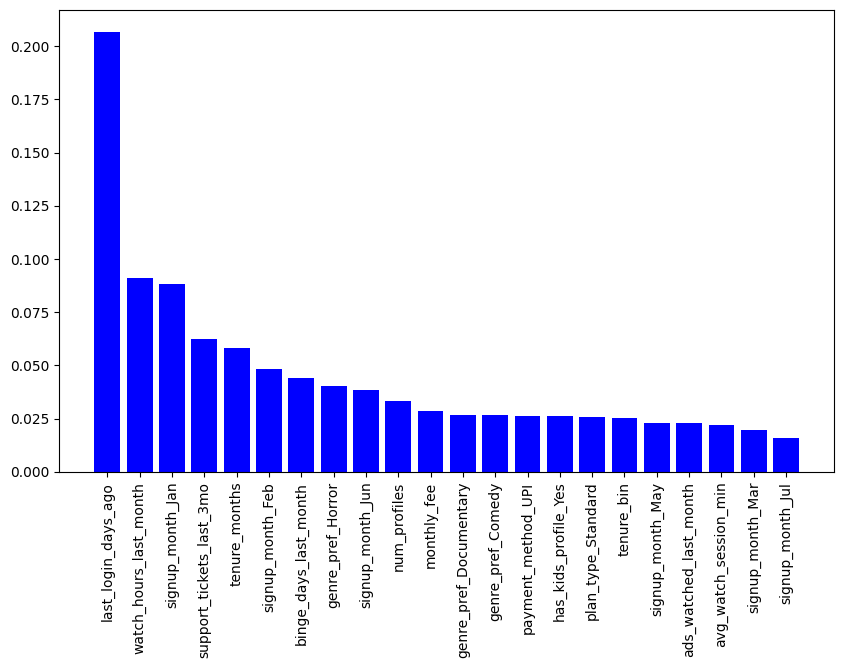

In [80]:
impdf  = pd.DataFrame({
    'FEATURE ' : X_train.columns,
    'IMPORTANCE' : modelXGB.feature_importances_
}).sort_values(by='IMPORTANCE', ascending=False)

print(impdf.head(10))
plt.figure(figsize=(10, 6))
plt.bar(impdf['FEATURE '], impdf['IMPORTANCE'], color='blue')
plt.xticks(rotation=90)

In [47]:
meanWatchDays = df[df['is_churned'] == 1]['binge_days_last_month'].mean()
print(meanWatchDays.round(0))
meanWatchHours = df[df['is_churned'] == 1]['watch_hours_last_month'].mean()
print(meanWatchHours.round(0))

5.0
30.0


In [76]:
revAd = df['ads_watched_last_month'].mean().round(0) * 150 / 1000
LTV = (df['tenure_months'].mean().round(0)*(df['monthly_fee'].mean().round(0)+revAd.round(0)))
print(f"{df[df['last_login_days_ago']>7].shape[0]/df.shape[0] * 100}% of customers logged in more than 7 days ago")
print(f"Average Monthly Revenue per User (ARPU): {df['monthly_fee'].mean().round(0)}")
print(f"{df['avg_watch_session_min'].mean().round(0)} minutes is the average watch session time")
print(f"{LTV} is the average customer lifetime value")

74.6068796068796% of customers logged in more than 7 days ago
Average Monthly Revenue per User (ARPU): 398.0
55.0 minutes is the average watch session time
7236.0 is the average customer lifetime value
